In [1]:
from ROOT import TFile
from ROOT import TCanvas, TPad, TLegend, TLatex
from rtColors import colorWheel

Welcome to JupyROOT 6.26/00


In [48]:
ERA = "2016preVFP"
trig_cuts = ["shower_shape", "seed", "HoverE", "Iso"]
ID_cuts = ["dZ", "SIP", "missingHits", "ConversionVeto", "miniIso"]
eta_bins = [-2.5, -2., -1.566, -1.444, -0.8, 0., 0.8, 1.444, 1.566, 2., 2.5]
pt_bins = [10, 20, 35, 50, 100, 200, 500]

In [55]:
class Canvas():
    def __init__(self, configs=None):
        self.cvs = TCanvas("c", "", 720, 800)
        self.cvs.SetLogx()
        
        self.legend = TLegend(0.45, 0.2, 0.9, 0.43)
        self.legend.SetFillStyle(0)
        self.legend.SetBorderSize(0)
        self.legend.SetNColumns(2)
        
        self.info = TLatex()
        self.info.SetTextSize(0.03)
        self.info.SetTextFont(42)
        self.extra_info = TLatex()
        self.extra_info.SetTextSize(0.02)
        self.extra_info.SetTextFont(52)
        self.logo = TLatex()
        self.logo.SetTextSize(0.04)
        self.logo.SetTextFont(61)
        self.extra_logo = TLatex()
        self.extra_logo.SetTextSize(0.035)
        self.extra_logo.SetTextFont(52)
        
        self.configs = configs
    
    # get 2D efficiency histograms
    def get_hists(self, h_data, h_mc):
        # make projections w.r.t. eta bins 
        self.projs_data = {}
        self.projs_mc = {}
        for bin in range(1, len(eta_bins)-1):
            proj_name = f"{eta_bins[bin]}to{eta_bins[bin+1]}"
            self.projs_data[proj_name] = h_data.ProjectionY(f"proj_data_{proj_name}", bin, bin)
            self.projs_mc[proj_name] = h_mc.ProjectionY(f"proj_mc_{proj_name}", bin, bin)
        self.__decorate()
        
    def __decorate(self):
        ylow = 0.2
        yhigh = 1.1
        
        for i, (name, hist) in enumerate(self.projs_data.items()):
            hist.SetStats(0)
            hist.SetTitle("")
            hist.GetXaxis().SetTitle("p_{T} [GeV]")
            hist.GetXaxis().SetTitleSize(0.03)
            hist.GetXaxis().SetTitleOffset(0.9)
            hist.GetXaxis().SetLabelSize(0.03)
            hist.GetYaxis().SetTitle("efficiency")
            hist.GetYaxis().SetTitleOffset(1.25)
            hist.GetYaxis().SetRangeUser(ylow, yhigh)
            hist.SetLineColor(3)
            hist.SetMarkerColor(3)
            hist.SetMarkerStyle(21)
            hist.SetMarkerSize(1)
            
        for i, (name, hist) in enumerate(self.projs_mc.items()):
            hist.SetStats(0)
            hist.SetTitle("")
            hist.GetXaxis().SetTitleSize(0)
            hist.GetXaxis().SetLabelSize(0)
            hist.GetYaxis().SetTitle("efficiency")
            hist.GetYaxis().SetTitleOffset(1.25)
            hist.GetYaxis().SetRangeUser(ylow, yhigh)
            hist.SetLineColor(5)
            hist.SetMarkerColor(5)
            hist.SetMarkerStyle(21)
            hist.SetMarkerSize(1)
            
    def combine(self):
        self.cvs.cd()
        for name, hist in self.projs_data.items():
            hist.Draw("p&same")
            self.legend.AddEntry(hist, f"data-{name}", "lep")
        for name, hist in self.projs_mc.items():
            hist.Draw("p&same")
            self.legend.AddEntry(hist, f"mc-{name}", "lep")
        self.legend.Draw("same")
        self.logo.DrawLatexNDC(0.15, 0.83, "CMS")
        self.extra_logo.DrawLatexNDC(0.15, 0.78, "Work in progress")
        
        if "info" in self.configs.keys():
            self.info.DrawLatexNDC(0.74, 0.91, self.configs["info"])
        if "extra_info" in self.configs.keys():
            self.extra_info.DrawLatexNDC(0.5, 0.8, self.configs["extra_info"])
        
    def draw(self):
        self.cvs.Draw()
        
    def savefig(self, figname):
        self.cvs.SaveAs(figname)

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c


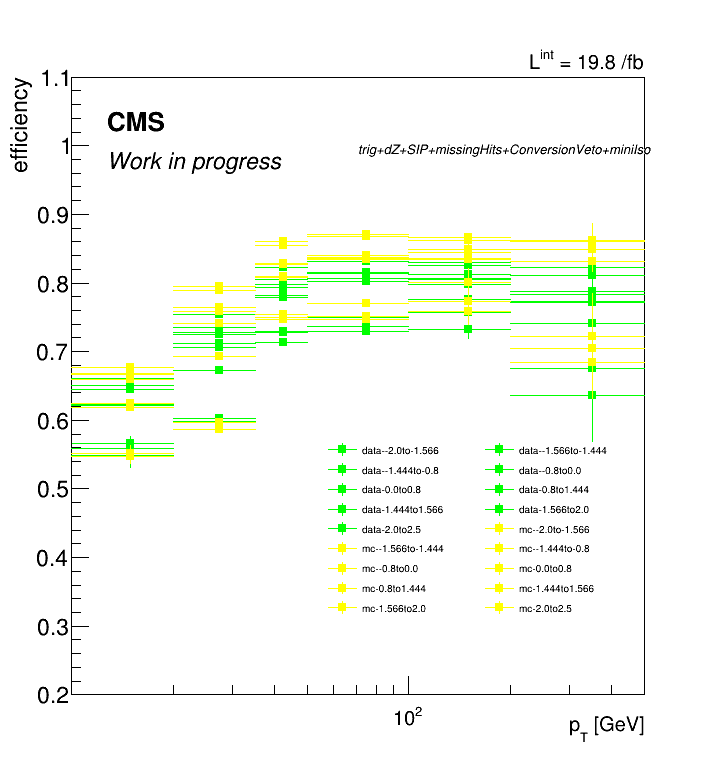

In [56]:
def get_eff_hists(era, cutname):
    f = TFile.Open(f"HcToWAElectron-FullRangeEta/{era}_{cutname}/efficiency.root")
    
    h_data = f.Get("data"); h_data.SetDirectory(0)
    h_mc = f.Get("sim"); h_mc.SetDirectory(0)
    f.Close()
    
    return (h_data, h_mc)

lumis = {
    "2016preVFP": 19.8,
    "2016postVFP": 19.8,
    "2017": 41.5,
    "2018": 59.7
}

for i, cut in enumerate(trig_cuts):
    extra_info = "showershape"
    for j in range(1, i+1):
        extra_info += f"+{trig_cuts[j]}"
    
    configs = {
        "info": "L^{int} = " + f"{lumis[ERA]} /fb",
        "extra_info": extra_info
    }
    
    h_data, h_mc = get_eff_hists(ERA, cut)
    cvs = Canvas(configs=configs)
    cvs.get_hists(h_data, h_mc)
    cvs.combine()
    cvs.draw()
    
for i, cut in enumerate(ID_cuts):
    extra_info = "trig"
    for j in range(0, i+1):
        extra_info += f"+{ID_cuts[j]}"
    
    configs = {
        "info": "L^{int} = " + f"{lumis[ERA]} /fb",
        "extra_info": extra_info
    }
    
    h_data, h_mc = get_eff_hists(ERA, cut)
    cvs = Canvas(configs=configs)
    cvs.get_hists(h_data, h_mc)
    cvs.combine()
    cvs.draw()